In [1]:
from datascience import *
import numpy as np
from math import *
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

## Hypothesis Testing

In Data8.2x, you have been using simulation to conduct hypothesis testing. Now that we have completed Data8.2x, this is a good time to take a step back and reflect on hypothesis testing. 

Every hypothesis test has roughly the same structure. The following 4 steps provide a rough outline:

1) State the null and alternate hypotheses. Generally, the alternate hypothesis is what you are trying to show. Essentially, if you want to show a result, we assume the opposite is true and try to prove ourselves wrong. 
        
        Always try to reject the null

2) Determine/calculate a test statistic. See your book for a formal definition, but generally, the test statistic is any quantity that helps us evaluate our sample with respect to our null hypothesis.

        Test Statistic- way to measure null against what you think is true
        
        Could use max(); range(); Sum(absVal of differences between observed and expected); 

3) Determine distribution of test statistic (UNDER H$o$) and compute a $p$-value. If you have taken inferential statistics before, you likely computed a $z$ or $t$ statistic and used a calculator or table to compute a $p$-value. This is based on asymptotic theory of sample means/proportions. This is not the approach taken in Data8.2x. With better computing power, we can use simulation to obtain an empirical distribution of our test statistic under the null hypothesis. 

        

4) Conclude. For low $p$-value (generally below 0.05), we reject the null hypothesis. For high $p$-value, we fail to reject. Low $p$-value implies that our sample would be very unusual if the null hypothesis were actually true. Therefore, that is evidence that the null hypothesis is wrong.

        pval- probability that we obtain our test statistic or weirder 
        
        either reject null or fail to reject null
        

### Example

Let's work through an example. Suppose that in the upcoming election, Referendum A is up for approval in Colorado. You suspect that in El Paso County, more than half of eligible voters support the referendum. You collect a random sample of 200 eligible voters in El Paso County and 115 of them express support. Is there evidence to conclude that supports your suspicion? 

#### Step 1: Hypothesis

State the null and alternative hypotheses.

Null: there is no difference in the proportion of supporters to rejecters of  Referendum A 

Alternate: There is there are more people in support of Ref A than those opposed

#### Step 2: Test Statistic

Select a test statistic and compute that test statistic for the sample.

Test statistic we are using = adding the absolute value of the difference between all observed vals and the expected val given that the the null is true (100).


In [2]:
ts=[]

for _ in np.arange(10000):
    rs=stats.multinomial.rvs(200,[.5,.5],size=1)
    ts=np.append(ts,np.sum(abs(rs-100)))
ts

array([12.,  6.,  8., ..., 14., 24., 18.])

<function matplotlib.pyplot.show(*args, **kw)>

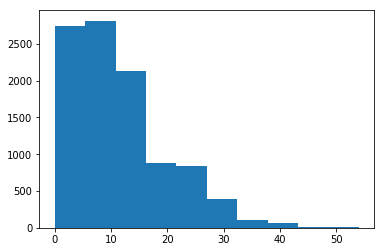

In [3]:
#For a visual aid for the distribution of ts 
plt.hist(ts)
plt.show

#### Step 3: $p$-value

3a) If $H_0$ were true, what should the value of $\hat{p}$ be close to? In other words, if in fact, half of eligible voters support the referendum, what value should your test statistic take? 

Assuming the null hypothesis is true, the p-hat value should be close to 0 because the difference between the expected and the observed. 

In [4]:
np.mean(ts>=15)

0.2922

3b) In words (and in the context of this problem), describe what the $p$-value is. 

A p-value of 0.2946 means that Assuming the null hypothesis is true, the probablilty of getting the result we did or "weirder" simply due to random chance is 29.463%

3c) Find the $p$-value directly and using simulation. Hint: the binomial distribution will be of use here. 

In [5]:
#NOTE: I used several python boxes, so don't feel the need to put everything in this box.

#p-val using simulation calculated above

#Binomial distribution
#Let X= the number of supporters for Ref A
#(P(X>=115))
print ("the p-value as calculated using a binomial distribution is ",stats.binom.pmf(np.arange(115,201,1),200,0.5).sum())


the p-value as calculated using a binomial distribution is  0.020018595806699947


#### Step 4: Conclude

What is your conclusion? Be sure to state your conclusion in the context of the problem.

Using the simulation p-value, we would fail to reject the null because 0.293>0.05 which means that we could have obtained that result given the null hypothesis just by random chance.

Using the binomial distribution, however, with a p-val of 0.02 which is less than 0.05, we could reject the null, because there is only a 2% chance that the results obtained were just by chance.

## Confidence Intervals

Construct and interpret a 95% confidence interval on $p$, the true proportion of eligible El Paso County voters who support the referendum. There are many ways to construct such an interval (bootstrap, the binomial distribution, asymptotically). Select one and implement. 

Also, compare your interval to the results of your hypothesis test. Does your interval contain the value 0.5? Why does that matter? 

The interval does not contain 0.5 that means we are 95% sure that the probability of choosing a person whos supports Ref A is not 0.5 (aka not equal to those opposed)

In [15]:
a = stats.binom.rvs(200, 115/200, size = 5000) / 200
print("Lower Bound:",percentile(2.5,a))
print("Upper Bound:",percentile(97.5,a))

Lower Bound: 0.505
Upper Bound: 0.645
